In [65]:
import numpy as np
import pandas as pd

from sklearn.model_selection import  train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt 
import xgboost as xgb
from xgboost import XGBClassifier

In [66]:
loan_train = pd.read_csv('./train_csv.csv')
loan_train.shape
                        

(614, 13)

In [67]:
loan_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


##### DATA PREPROCESSING

In [68]:
total_null = loan_train.isnull().sum().sort_values(ascending=False)

In [69]:
total_null

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
loan_train['Gender'] = loan_train['Gender'].fillna( loan_train['Gender'].dropna().mode().values[0] )
loan_train['Married'] = loan_train['Married'].fillna( loan_train['Married'].dropna().mode().values[0])
loan_train['Dependents'] = loan_train['Dependents'].fillna ( loan_train['Dependents'].dropna().mode().values[0])
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna( loan_train['Self_Employed'].dropna().mode().values[0] )
loan_train['LoanAmount'] = loan_train['LoanAmount'].fillna( loan_train['LoanAmount'].dropna().mean() )

loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna( loan_train['Loan_Amount_Term'].dropna().mode().values[0])

loan_train['Credit_History'] = loan_train['Credit_History'].fillna( loan_train['Credit_History'].dropna().mode().values[0] )
                                                           

##### HANDLING CATEGORICAL DATA

In [71]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [72]:
#Looking at uniques Values
print(set(loan_train['Gender'].values.tolist()))
print(set(loan_train['Married'].values.tolist()))
print(set(loan_train['Dependents'].values.tolist()))
print(set(loan_train['Education'].values.tolist()))
print(set(loan_train['Self_Employed'].values.tolist()))
print(set(loan_train['Property_Area'].values.tolist()))
print(set(loan_train['Loan_Status'].values.tolist()))


#ALTERNATIVELY

print('\n ALTERNATIVE SOLUTION \n')
print(loan_train['Gender'].unique().tolist())
print(loan_train['Married'].unique().tolist())
print(loan_train['Dependents'].unique().tolist())
print(loan_train['Education'].unique().tolist())
print(loan_train['Self_Employed'].unique().tolist())
print(loan_train['Property_Area'].unique().tolist())
print(loan_train['Loan_Status'].unique().tolist())


{'Female', 'Male'}
{'No', 'Yes'}
{'0', '2', '1', '3+'}
{'Not Graduate', 'Graduate'}
{'No', 'Yes'}
{'Semiurban', 'Rural', 'Urban'}
{'Y', 'N'}

 ALTERNATIVE SOLUTION 

['Male', 'Female']
['No', 'Yes']
['0', '1', '2', '3+']
['Graduate', 'Not Graduate']
['No', 'Yes']
['Urban', 'Rural', 'Semiurban']
['Y', 'N']


In [73]:
loan_train['Loan_Status'] = loan_train['Loan_Status'].replace({'N': 0, 'Y': 1}).astype(int)


loan_train = pd.get_dummies(loan_train, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area',])

loan_train.head(50)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
5,LP001011,5417,4196.0,267.000000,360.0,1.0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
6,LP001013,2333,1516.0,95.000000,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
7,LP001014,3036,2504.0,158.000000,360.0,0.0,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0
8,LP001018,4006,1526.0,168.000000,360.0,1.0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
9,LP001020,12841,10968.0,349.000000,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0


In [74]:
#splitting the dataset

y = loan_train['Loan_Status']
X = loan_train.drop(['Loan_Status','Loan_ID'],axis=1)

X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42 )


##### TRAINING MACHINE LEARNING MODELS

In [75]:


gbm_param_grid = {
    'n_estimators':range(1,1000,10),
    'max_depth':range(1,20),
    'learning_rate':[.1,.4,.45,.5,.55,.6],
    'colsample_bytree':[.6,.7,.8,.9,1],
}

xgb_classifier = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                 estimator = xgb_classifier,
                                  scoring = 'accuracy',
                                  verbose = 0,
                                  n_iter = 100,
                                  cv = 4
                                     )

In [76]:
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=na...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'learning_rate': [0.1, 0.4, 0.45, 0.5,
                                                          0.55, 0.6],
                                        'max_depth': range(1, 20),
                                        'n_estimators': range(1, 1000, 10)},
                   scoring='accuracy')

In [77]:
best_params = xgb_random.best_params_
print(f'Best Parameters : {best_params}')

Best Parameters : {'n_estimators': 531, 'max_depth': 1, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [78]:
y_pred = xgb_random.predict(X_test)
accuracy = np.sum(y_pred == y_test)/len(y_test)
print(f'accuracy :{accuracy}')

accuracy :0.7967479674796748


In [79]:
rf_param_grid = {
    'n_estimators':range(1,1000,10)
}
rf  = RandomForestClassifier()
rf_random = RandomizedSearchCV(
    param_distributions = rf_param_grid,
    estimator = rf, scoring = 'accuracy',
    verbose = 0,
    n_iter = 100,
    cv = 4)
    

In [80]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'n_estimators': range(1, 1000, 10)},
                   scoring='accuracy')

In [81]:
best_params = rf_random.best_params_
print(f'Best Params: {best_params}')
y_pred1  = rf_random.predict(X_test)
accuracy = np.sum(y_pred1 == y_test ) / len(y_test)
print(f'Accuracy:{accuracy}')

Best Params: {'n_estimators': 171}
Accuracy:0.7642276422764228


In [82]:
param_grid = {'max_depth':range(4,25),
              'min_samples_leaf':range(10,100,10),
              'min_samples_split':range(10,100,10),
              'criterion':['gini','entropy']
              }

n_folds = 5

dt = DecisionTreeClassifier(random_state = 42)



dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=n_folds,
    return_train_score=True,
    verbose=0
)


In [83]:
dt_grid.fit(X_train,y_train)
print(dt_grid.best_params_)
print(dt_grid.best_estimator_)
y_pred_best = dt_grid.predict(X_test)
acc = accuracy_score(y_test,y_pred_best)
print(f'accuracy:{acc}')

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=10,
                       random_state=42)
accuracy:0.7804878048780488


In [ ]:
svm_param_grid = {
'kernel':['linear','poly','rbf','sigmoid'],
    'C':range(1,11)
}

svm = SVC()
svm_random = RandomizedSearchCV(param_distributions = svm_param_grid, estimator = svm , scoring = 'accuracy', verbose = 0 ,n_iter = 100, cv = 4 )
svm_random.fit(X_train,y_train)
y_pred = svm_random.fit(X_test)
acc = accuracy_score(y_test,y_pred)

#####  FEATURE IMPORTANCE

In [94]:
def feature_imp(df,model):
    feat = pd.DataFrame(columns = ['feature','importance'])
    feat['feature'] = df.columns
    feat['importance'] = model.best_estimator_.feature_importances_
    return feat.sort_values(by ='importance', ascending = False)


<AxesSubplot:ylabel='feature'>

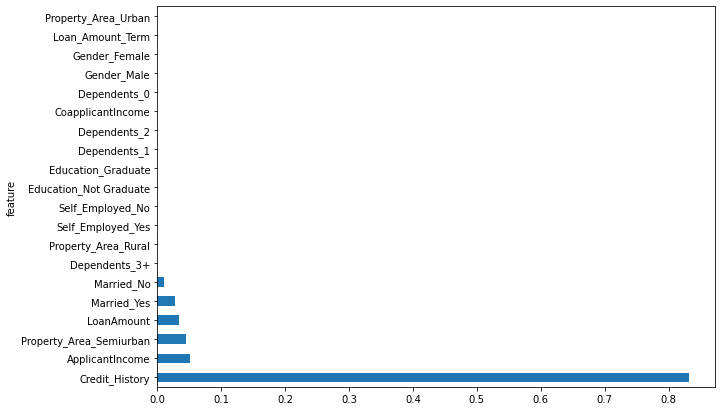

In [95]:
#FEATURE IMPORTANCE FOR DECISON TREE
feature_imp(X_train,dt_grid).plot('feature','importance','barh' ,figsize = (10,7), legend = False )


In [ ]:
#FEATURE IMPORTANCE FOR RANDOM FOREST
feature_imp(X_train,rf_random ).plot('feature','importance','barh' figsize = (10,7) legend = False )

In [ ]:
#FEATURE IMPORTANCE FOR XGBoost
feature_imp(X_train,xgb_random).plot('feature','importance','barh' figsize = (10,7) legend = False )